# New regimes of Josephson junction arrays

In [5]:
import JJArray as jja
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from scipy.sparse import bmat
from tqdm.notebook import tqdm

# Full Hamiltonian

In [72]:
N = 4
MuliCharge_ncut = 3*N
Ncut = int(MuliCharge_ncut/N)

EC = np.array([0.1,1,1,0.1])#np.full((N), 2.5)
EJ = np.full((N), 0.1)
EJb = 10
ECb = 2.5
phi = 0.

H = jja.H_array(phi, N , Ncut, EJ, EC, EJb, ECb)

# Setup of the system by symmetry sectors

Generate unitary transformations for each symmetry sector

In [73]:
%time V = jja.ChargeToTranslation(N,Ncut)

Full Hilbert space dimension =  2401


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/616 [00:00<?, ?it/s]

Sector 0= 616


  0%|          | 0/616 [00:00<?, ?it/s]

Sector 1= 588


  0%|          | 0/616 [00:00<?, ?it/s]

Sector 2= 609


  0%|          | 0/616 [00:00<?, ?it/s]

Sector 3= 588
Sum of sector dimensions =  2401
CPU times: user 196 ms, sys: 24 ms, total: 220 ms
Wall time: 200 ms


  0%|          | 0/20 [00:00<?, ?it/s]

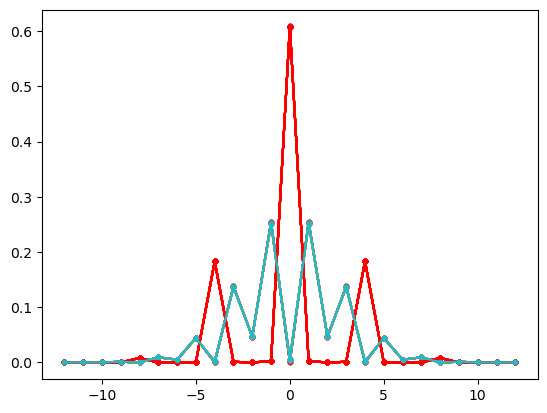

In [74]:
ph_list = np.linspace(0,1,20)

scan = {}
[scan.update({k:[]}) for k in range(N)]

for ph in tqdm(ph_list):
    
    H = jja.H_array(ph, N , Ncut, EJ, EC, EJb, ECb)
    evals, evecs, symmetric_data = jja.SortedDiagonalization(H,V,10)
    [scan[k].append(symmetric_data[k][0]-symmetric_data[0][0][0]) for k in range(N)] 
    # plt.imshow([[ME(symmetric_data[0][1][i],jja.Op(CosPhi,N,0),symmetric_data[1][1][j]) for i in range(10)] for j in range(10)])
    # plt.show()
    
    
    bs = jja.cartesian([np.arange(-Ncut,Ncut+1) for r in range(N)])
    chrgs = np.array([np.sum(bs[r]) for r in range(len(bs))])

    state = evecs[0]
    ChDist = np.array([np.sum((np.abs(state)[np.where(chrgs==r)[0]])**2) for r in range(-N*Ncut,N*Ncut+1)])
    plt.plot(np.unique(chrgs),ChDist,'r.-')

    state = evecs[1]
    ChDist = np.array([np.sum((np.abs(state)[np.where(chrgs==r)[0]])**2) for r in range(-N*Ncut,N*Ncut+1)])
    plt.plot(np.unique(chrgs),ChDist,'.-')

    plt.grid()
    # plt.show()

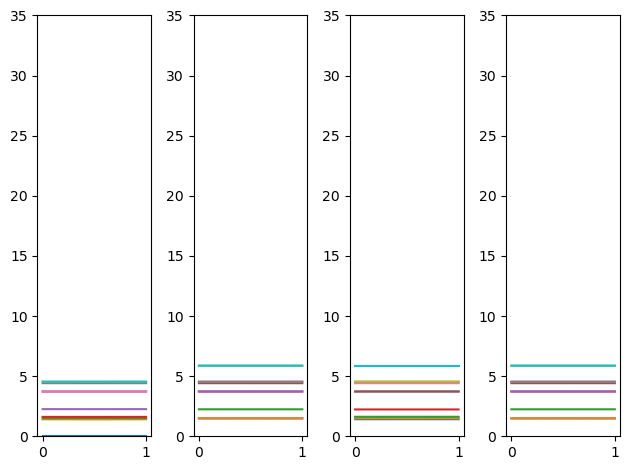

In [69]:
fig, ax = plt.subplots(1,N)

[ax[r].plot(ph_list,np.array(scan[r])) for r in range(N)];
[ax[r].set_ylim([0,35]) for r in range(N)]
# [ax[r].set_xticks([]) for r in range(N)]

fig.tight_layout()

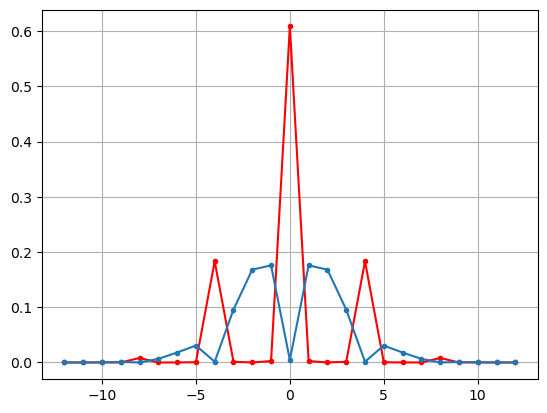

In [70]:
bs = jja.cartesian([np.arange(-Ncut,Ncut+1) for r in range(N)])
chrgs = np.array([np.sum(bs[r]) for r in range(len(bs))])

state = evecs[0]
ChDist = np.array([np.sum((np.abs(state)[np.where(chrgs==r)[0]])**2) for r in range(-N*Ncut,N*Ncut+1)])
plt.plot(np.unique(chrgs),ChDist,'r.-')

state = evecs[1]
ChDist = np.array([np.sum((np.abs(state)[np.where(chrgs==r)[0]])**2) for r in range(-N*Ncut,N*Ncut+1)])
plt.plot(np.unique(chrgs),ChDist,'.-')

plt.grid()

In [18]:
symmetric_data[0][1][0]

Quantum object: dims = [[7, 7, 7], [1, 1, 1]], shape = (343, 1), type = ket
Qobj data =
[[2.81177574e-03-2.59687402e-03j]
 [4.04924846e-05-3.73976771e-05j]
 [1.14751365e-07-1.05981012e-07j]
 [1.28611571e-10-1.18781905e-10j]
 [0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j]
 [4.04924846e-05-3.73976771e-05j]
 [1.82671212e-04-1.68709801e-04j]
 [1.55541600e-06-1.43653683e-06j]
 [3.16145489e-09-2.91982747e-09j]
 [2.75375234e-12-2.54329861e-12j]
 [0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j]
 [1.14751365e-07-1.05981012e-07j]
 [1.55541600e-06-1.43653683e-06j]
 [2.15776504e-06-1.99284882e-06j]
 [1.20045413e-08-1.10870440e-08j]
 [1.82738323e-11-1.68771718e-11j]
 [0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j]
 [1.28611571e-10-1.18781905e-10j]
 [3.16145488e-09-2.91982748e-09j]
 [1.20045413e-08-1.10870440e-08j]
 [5.54375253e-09-5.12004807e-09j]
 [2.01786195e-11-1.86363808e-11j]
 [0.00000000e+00+0.00000000e

In [24]:
def ME(Bra,OP,Ket):
    
    
    
    MatrixElement2 = np.abs((Bra.dag()*OP*Ket).full()[0,0])**2 #e^2, in SI

    return MatrixElement2

In [34]:
Tp = qt.Qobj(np.diag(np.ones(2 * Ncut + 1 - 1), 1))
Tm = Tp.dag()
CosPhi = (Tp - Tm) / (2*1j)

In [35]:
ME(symmetric_data[0][1][0],jja.Op(CosPhi,N,0),symmetric_data[2][1][2])

0.0

In [33]:
evals

array([-4.45752331,  2.2094253 ,  2.25507882,  2.25507882,  2.35038947,
        2.35038947,  2.39772538, 11.65443259, 11.65443259])

## Check block-diagonal form of the Hamiltonian in the symmetric basis (use small N, Ncut for safety)

In [75]:
H_V = bmat([[V[i].dag()*H*V[j] for j in range(N)] for i in tqdm(range(N))])

  0%|          | 0/4 [00:00<?, ?it/s]

Text(0.5, 1.0, 'H in the symmetric basis')

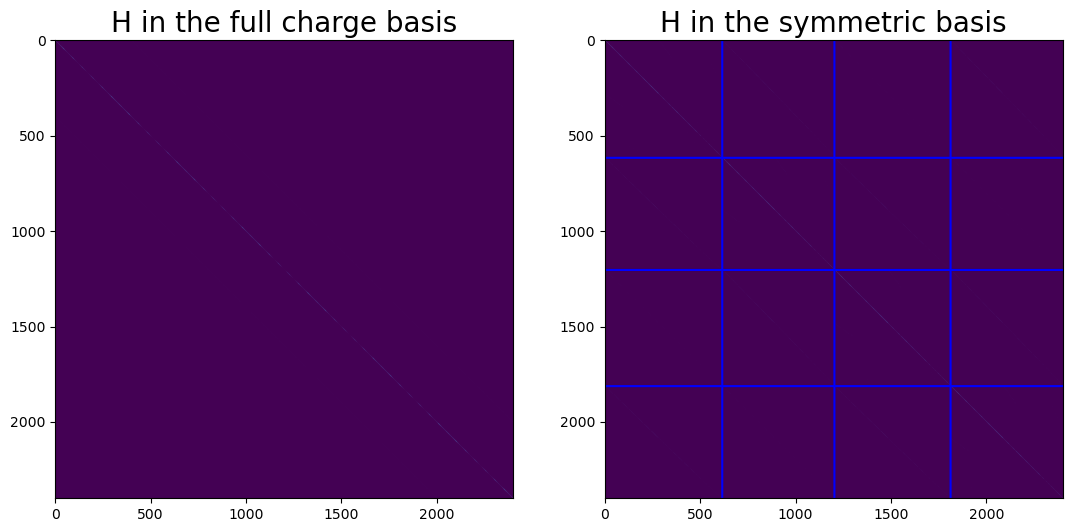

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,13))


ax1.imshow(np.abs(H.full()))
ax1.set_title('H in the full charge basis', size = 20)

ax2.imshow(np.abs(H_V.toarray()))

sm = V[0].shape[1]
for i in range(1,N):
    ax2.plot(np.arange(0,H.shape[0]),(sm-0.5)*np.ones(H.shape[0]),'b')
    ax2.plot((sm-0.5)*np.ones(H.shape[0]),np.arange(0,H.shape[0]),'b')
    sm = sm + V[i].shape[1]
    
ax2.set_title('H in the symmetric basis', size = 20)